Pobranie danych:

In [78]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)

Przykładowa bitmapa:

In [79]:
import numpy as np

print((np.array(mnist.data.loc[42]).reshape(28, 28) > 0).astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 

Przykładowy obrazek:

In [80]:
print(mnist.data.loc)

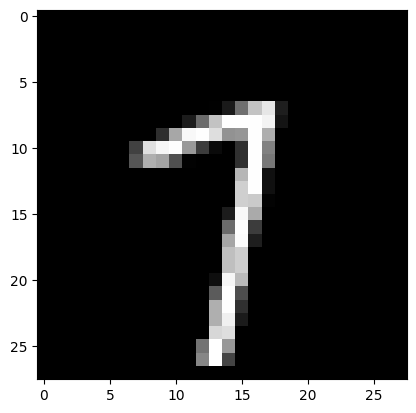

In [81]:
from matplotlib import pyplot as plt 

pixels = np.array(mnist.data.loc[42]).reshape(28, 28)
plt.imshow(pixels, cmap='grey')
plt.show()

Sprawdź w dokumentacji użytej funkcji jakie własności otrzymanego obiektu przechowują cechy
(features; zwyczajowo nazywany X) oraz etykiet (labels; zwyczajowo nazywany y).
Obejrzyj zbiory cech oraz etykiet w pobranym zbiorze danych. Jakiego są typu? Czy zbiór jest
uporządkowany według tego, jaka cyfra znajduje się na danym obrazku?

In [82]:
print(mnist.keys())
print(type(mnist.data)) # x_features
print(type(mnist.target)) # y_labels


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Dane 'mnist.data' są w formie <pandas.DataFrame>, a etykiety 'mnist.target' w formie <pandas.Series>.

In [83]:
print(mnist.data.head(5))
print(mnist.target[:5])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [84]:
import pandas as pd

x_features = pd.DataFrame(mnist.data)
y_labels = pd.DataFrame(mnist.target)

In [85]:
print(np.unique(y_labels[:1000]))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


Zbiór nie jest uporządkowany według tego, jaka cyfra znajduje się na danym obrazku. Dane są losowo uporządkowane.

Sortowanie zbiorów:

In [86]:
y_labels_sorted = y_labels.sort_values(by='class')
print(np.unique(y_labels_sorted["class"][:1000]))
x_features_sorted = x_features.reindex(y_labels_sorted.index)

['0']


Dzielenie zbiorów ręcznie:

In [87]:
x_train_sorted, x_test_sorted = x_features_sorted[:56000], x_features_sorted[56000:]
y_train_sorted, y_test_sorted = y_labels_sorted[:56000], y_labels_sorted[56000:]
print(x_train_sorted.shape, y_train_sorted.shape)
print(x_test_sorted.shape, y_test_sorted.shape)
print(np.unique(y_test_sorted))
print(np.unique(y_train_sorted))

(56000, 784) (56000, 1)
(14000, 784) (14000, 1)
['7' '8' '9']
['0' '1' '2' '3' '4' '5' '6' '7']


Użycie wbudowanej funkcji do dzielenia:

In [88]:
from sklearn.model_selection import train_test_split

x_train_sorted_split, x_test_sorted_split = train_test_split(x_features_sorted, test_size=0.2, shuffle=False)
y_train_sorted_split, y_test_sorted_split = train_test_split(y_labels_sorted, test_size=0.2, shuffle=False)
print(np.unique(y_test_sorted_split))
print(np.unique(y_train_sorted_split))

['7' '8' '9']
['0' '1' '2' '3' '4' '5' '6' '7']


Z wymieszaniem danych (shuffle):

In [89]:
from sklearn.model_selection import train_test_split

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_features_sorted, y_labels_sorted, test_size=0.2, random_state=42, stratify=y_labels_sorted)
print(np.unique(y_test_split))
print(np.unique(y_train_split))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


Binarna tablica czy jest 0:

In [90]:
y_train_split_bin = (y_train_split == '0')
y_test_split_bin = (y_test_split == '0')
print(np.unique(y_train_split))
print(np.unique(y_train_split_bin))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[False  True]


Uczenie modelu:

In [91]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(x_train_split, y_train_split_bin)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [92]:
acc_list = []

accuracy_train = sgdc.score(x_train_split, y_train_split_bin)
print(f"Dokładność modelu na zbiorze trenującym: {accuracy_train:.4f}")
acc_list.append(float(accuracy_train))

accuracy_test = sgdc.score(x_test_split, y_test_split_bin)
print(f"Dokładność modelu zbiorze testującym: {accuracy_test:.4f}")
acc_list.append(float(accuracy_test))

Dokładność modelu na zbiorze trenującym: 0.9910
Dokładność modelu zbiorze testującym: 0.9875


Zapis wyniku do pliku Pickle:

In [93]:
import pickle

file_name_acc = "sgd_acc.pkl"

pickle.dump(acc_list, open(file_name_acc, "wb"))

Walidacja krzyżowa dokładności:

In [94]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(sgdc, x_train_split, y_train_split_bin, cv=3, scoring="accuracy", n_jobs=1)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
file_name_cvs = "sgd_cva.pkl"
pickle.dump(cvs, open(file_name_cvs, "wb"))

Uczenie wieloklasowe:

In [96]:
sgdc_multi = SGDClassifier()
sgdc_multi.fit(x_train_split, y_train_split)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_train_predicted = sgdc_multi.predict(x_train_split) 
conf_matrix = confusion_matrix(y_train_split, y_pred=y_train_predicted)

file_name_conf_matrix = "sgd_cmx.pkl"
pickle.dump(conf_matrix, open(file_name_conf_matrix, "wb"))

Wizualizacja:

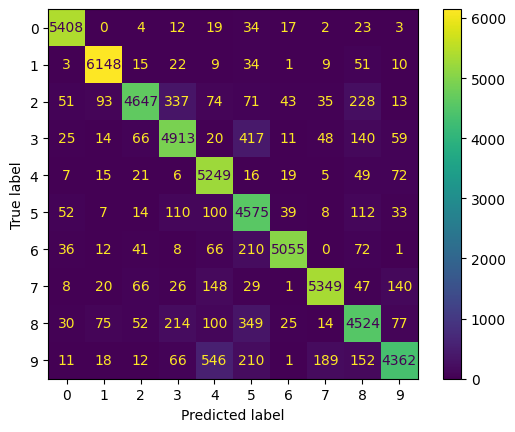

In [98]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [101]:
accuracy_train_multi = sgdc_multi.score(x_train_split, y_train_split)
print(f"Dokładność modelu na zbiorze trenującym: {accuracy_train_multi:.4f}")

accuracy_test_multi = sgdc_multi.score(x_test_split, y_test_split)
print(f"Dokładność modelu zbiorze testującym: {accuracy_test_multi:.4f}")

Dokładność modelu na zbiorze trenującym: 0.8970
Dokładność modelu zbiorze testującym: 0.8851
